# Lab 03 - Decision Boundaries

Submitted By: Julian Singkham  
Date: SEP 27 2021

# Abstract

The purpose of this lab is to familiarize ourselves with feature selection for decision boundaires and benchmarking decision bondary accuracy. Additinonally, at the end of the lab we were introduced to splitting a data set into training, testing, and validation sets to see how decision boundary accuracy is affected.

* The first part of the lab involved creating multiple decision boundaries on the setosa data set and comparing their accuracies using linear_decision_boundary_classifier() and SKLearn.
* The second part of the lab involved using the versicolor_virginica data set to compare feature set plots and how they affect decision boundary accuracy.
* The third part of the lab involved comparing the decision boundary accuracy with the setosa data set being split into training, testing, and validation sets.

The data utilized in this lab is the iris dataset from R.A. Fisher and provided by Dr. Salami

# Reflection Questions

### Problem 1:
1. Just by looking at your plot, which of the three decision boundaries does a better job of separating the two classes of points?  

Boundary 2

2. Which of the three decision boundaries gave the more accurate predictions?

Boundary 2

3. How does the accuracy metric seem to relate to the ability of the decision boundary to separate the classes?

The accuracy metric relates the ability of the decision boundary to separate the classes by comparing how well the boundary separates the labels. An accuracy of 1.0 means that the boundary fully separates the two labels where all of label A is above the line and all of label B is below the line.

### Problem 2:
1. For which pair of features are the classes more easily separated?

Petal features

2. Just by looking at your plots, for which pair of features does the decision boundary do a better job of separating the classes?

Petal features

3. Which decision boundary gives the most accurate predictions?

Decision boundary 2 (petals)

4. How does the choice of features seem to impact the ability to make accurate predictions?

Different features have different weights in terms of labeling. For instance when looking at the sepal plot, it seems that sepal length and width have little to no impact on the labeling of the flower as it appears random. This means that a model trained on sepal length and width will have a low accuracy score as it is unable to decipher a clear difference between the labels. When using the petal features, there is a clear divide between the labels, thus a model trained on petal features will have high accuracy.

### Problem 3:
1. Compare the accuracies you calculated from the training and testing data sets. Predictions for which data set were evaluated as more accurate? Which accuracy score do you think is a more realistic representation of the performance of the model?

The training set is the most accurate, but this is due to the training and evaluating set being the same so this does not count. That would place the validation set as the most accurate with an accuracy rating of 86.4%. Personally, I believe the validation set to be the most realistic representation of the performance of the model due to containing 44 data points while the testing set contains 42 data points.

2. Look at the scatter plot of the validation data points. Will the model make errors in predicting the labels? Why?

Based on the scatter plot of the validation data points, the model will make errors in predicting the labels. This is evident in that 6 setosa datapoints are on the not setosa side of the boundary line.

3. Look at the scatter plots of the training and testing data points. Which data set is more representative of the validation data set? Which data set will demonstrate errors similar to the validation set?

The testing set is more representative of the validation dataset as the scatter plots closely resemble eachother. Additionally, the testing set also has 6 data points labeled as setosa on the not setosa side of the boundary. This also means the testing set will exhibit errors similar to the validation set.

4. Compare the accuracies you calculated from the training and testing data sets to the validation data set. Which accuracy calculation is more representative of the accuracy for the validation data set?

As stated above, the training set does not count as it is comparing to itself. The testing set is more representative of the accuracy of the validation set as it only differs by about 0.65%.
5. Explain why training and evaluating a model on the same data set can be deceptive.

Training and evaluating a model on the same data set can be deceptive as it gives a false sense of accuracy. Having the same data present between the training and testing set will give a high accuracy score as the model is practicaly given the answers.
6. Explain how dividing data into training and testing sets with no repeated points resolves some of the problems associated with training and evaluating a model on the same data set.

Generting training and testing sets with no repeated points can resolve most of the problems associated with training and testing the model on the same data set as the model will encounter new data in the test set. This prevents the model from cheating as the data used in the test set will not be found in the training set. This in turn creates a more truthful accuracy.
7. What are the potential ramifications for publishing a model that was trained and characterized using the same data set?

Some of the possible ramifications are the model being overfitt to the training set and non-truthful accuracy.

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
from decision_boundaries import linear_decision_boundary_classifier
import sklearn as sk
from sklearn import metrics

# Instructions
### 1. Decision boundaries and Evaluation of Model Predictions with Metrics  

##### A. Load the "setosa_data.csv" using the Pandas read_csv() function

In [2]:
# Import csv to data frame
df_setosa = pd.read_csv('setosa_data.csv')

##### B. Display the first few rows of the DataFrame using the head() function.

##### C. Create a scatter plot of the data set points with the sepal length on the horizontal axis and the sepal width on the vertical axis. Color each point by its class (orange for setosa, blue for not setosa).

Text(0, 0.5, 'Sepal Width [cm]')

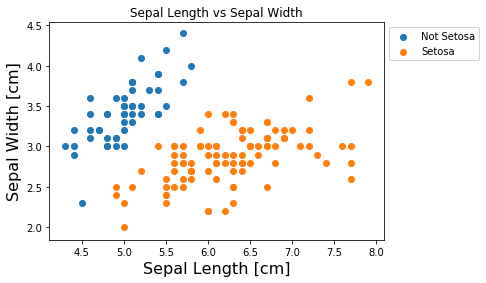

In [3]:
# Plot dataframe with labels
plt.title("Sepal Length vs Sepal Width")
plt.scatter(df_setosa["sepal_length (cm)"][:50], df_setosa["sepal_width (cm)"][:50], label="Not Setosa")
plt.scatter(df_setosa["sepal_length (cm)"][50:], df_setosa["sepal_width (cm)"][50:], label="Setosa")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.xlabel("Sepal Length [cm]", fontsize=16)
plt.ylabel("Sepal Width [cm]", fontsize=16)

##### D. Plot in the specified color and label the decision boundaries defined by the following equations:
Decision Boundary 1 (black): $y = 2x – 8$  
Decision Boundary 2 (red): $y = 0.75x – 0.9$  
Decision Boundary 3 (purple): $y = -2x + 12$  
Note: in this experimental setup, the x axis corresponds to sepal length and the y axis corresponds to the vertical axis.

Text(0, 0.5, 'Sepal Width [cm]')

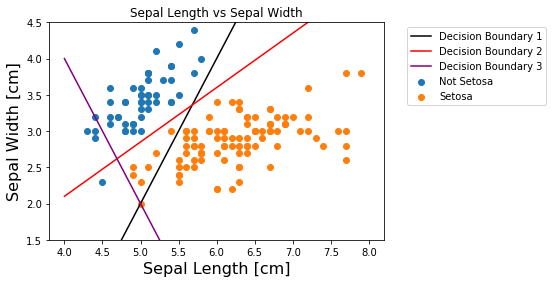

In [4]:
# Plot dataframe with labels
plt.title("Sepal Length vs Sepal Width")
plt.scatter(df_setosa["sepal_length (cm)"][:50], df_setosa["sepal_width (cm)"][:50], label="Not Setosa")
plt.scatter(df_setosa["sepal_length (cm)"][50:], df_setosa["sepal_width (cm)"][50:], label="Setosa")

# Plot decision boundaries
x = np.linspace(4, 8, 10)
plt.plot(x, 2*x-8, color="black", label="Decision Boundary 1")
plt.plot(x, 0.75*x-0.9, color="red", label="Decision Boundary 2")
plt.plot(x, -2*x+12, color="purple",label="Decision Boundary 3")

plt.ylim([1.5, 4.5])
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel("Sepal Length [cm]", fontsize=16)
plt.ylabel("Sepal Width [cm]", fontsize=16)

##### E. Rewrite each decision boundary equation in a modified standard form:
$$Ax+By+c=0$$

Decision Boundary 1 (black): $-2x + y + 8 = 0$  
Decision Boundary 2 (red): $-0.75x + y + 0.9 = 0$  
Decision Boundary 3 (purple): $2x + y - 12 = 0$ 

##### F. Import the linear_decision_boundary_classifier() function from the provided decision_boundaries.py file.
Call the function for each decision boundary like so:  
`dec_bound_vec = np.array([0.75, -1.0, -0.9])
features = setosa_df[["sepal_length (cm)", "sepal_width(cm)"]].values
true_labels = setosa_df["label"].values
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
print(pred_labels)`

##### G. Use the scikit-learn `sklearn.metrics.accuracy_score()` function to calculate and print the accuracy of the predictions using each decision boundary using the true and predicted labels.

In [5]:
features = df_setosa[["sepal_length (cm)", "sepal_width (cm)"]].values
true_labels = df_setosa["label"].values

# Boundary 1
dec_bound_vec = np.array([-2.0, 1.0, 8.0])
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
accuracy = sk.metrics.accuracy_score(true_labels, pred_labels)
print("Boundary 1 Accuracy:", accuracy)

# Boundary 2
dec_bound_vec = np.array([-0.75, 1.0, 0.9])
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
accuracy = sk.metrics.accuracy_score(true_labels, pred_labels)
print("Boundary 2 Accuracy:", accuracy)

# Boundary 3
dec_bound_vec = np.array([2.0, 1.0, -12.0])
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
accuracy = sk.metrics.accuracy_score(true_labels, pred_labels)
print("Boundary 3 Accuracy:", accuracy)

Boundary 1 Accuracy: 0.96
Boundary 2 Accuracy: 0.9933333333333333
Boundary 3 Accuracy: 0.6933333333333334


### 2. Predictive Power of Features

##### A. Load the "versicolor_virginica_data.csv" using the Pandas read_csv() function.

In [6]:
# Import csv to data frame
df_v = pd.read_csv('versicolor_virginica_data.csv')

##### B. Display the first few rows of the Dataframe using the head() function.

In [7]:
df_v.head(3)

,label,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm)
0,versicolor,7.0,3.2,4.7,1.4
1,versicolor,6.4,3.2,4.5,1.5
2,versicolor,6.9,3.1,4.9,1.5


##### C. Create a scatter plot of the data set points with the sepal length on the horizontal axis and the sepal width on the vertical axis. Color each point by its class (orange for versicolor, blue for virginica)

Text(0, 0.5, 'Sepal Width [cm]')

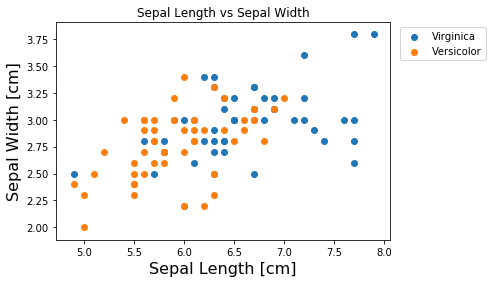

In [8]:
# Plot dataframe with sepal labels
plt.title("Sepal Length vs Sepal Width")
plt.scatter(df_v["sepal_length (cm)"][50:], df_v["sepal_width (cm)"][50:], label="Virginica")
plt.scatter(df_v["sepal_length (cm)"][:50], df_v["sepal_width (cm)"][:50], label="Versicolor")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.xlabel("Sepal Length [cm]", fontsize=16)
plt.ylabel("Sepal Width [cm]", fontsize=16)

##### D. Create a second scatter plot of the data set points with the petal length on the horizontal axis and the petal width on the vertical axis. Color each point by its class (orange for versicolor, blue for virginica)

Text(0, 0.5, 'Petal Width [cm]')

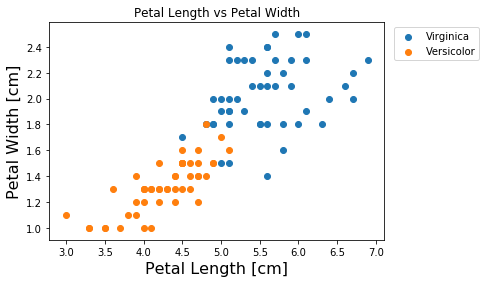

In [9]:
# Plot dataframe with petal labels
plt.title("Petal Length vs Petal Width")
plt.scatter(df_v["petal_length (cm)"][50:], df_v["petal_width (cm)"][50:], label="Virginica")
plt.scatter(df_v["petal_length (cm)"][:50], df_v["petal_width (cm)"][:50], label="Versicolor")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.xlabel("Petal Length [cm]", fontsize=16)
plt.ylabel("Petal Width [cm]", fontsize=16)

##### E. For each pair of features, and plot and label the decision boundaries defined by the following equations:
Decision Boundary 1 (black, sepal length and width): $y = -0.7x + 7$  
Decision Boundary 2 (black, petal length and width): $y = -0.7x + 5$

Text(0, 0.5, 'Sepal Width [cm]')

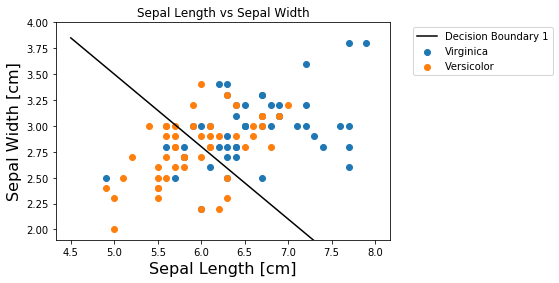

In [10]:
# Plot dataframe with sepal labels
plt.title("Sepal Length vs Sepal Width")
plt.scatter(df_v["sepal_length (cm)"][50:], df_v["sepal_width (cm)"][50:], label="Virginica")
plt.scatter(df_v["sepal_length (cm)"][:50], df_v["sepal_width (cm)"][:50], label="Versicolor")

# Plot decision boundaries
x = np.linspace(4.5, 8, 10)
plt.plot(x, -0.7*x+7, color="black", label="Decision Boundary 1")

plt.ylim([1.9, 4])
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel("Sepal Length [cm]", fontsize=16)
plt.ylabel("Sepal Width [cm]", fontsize=16)

Text(0, 0.5, 'Petal Width [cm]')

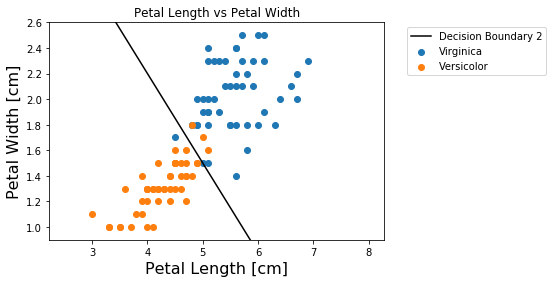

In [11]:
# Plot dataframe with petal labels
plt.title("Petal Length vs Petal Width")
plt.scatter(df_v["petal_length (cm)"][50:], df_v["petal_width (cm)"][50:], label="Virginica")
plt.scatter(df_v["petal_length (cm)"][:50], df_v["petal_width (cm)"][:50], label="Versicolor")

# Plot decision boundaries
x = np.linspace(2.5, 8, 10)
plt.plot(x, -0.7*x+5, color="black", label="Decision Boundary 2")

plt.ylim([0.9, 2.6])
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel("Petal Length [cm]", fontsize=16)
plt.ylabel("Petal Width [cm]", fontsize=16)

##### F. Rewrite each decision boundary equation in a modified standard form:
$$Ax + By + c = 0$$

Sepal Decision Boundary: $0.7x + y - 7 = 0$  
Petal Decision Boundary: $0.7x + y - 5 = 0$

##### G. Import the linear_decision_boundary_classifier() function from the provided decision_boundaries.py file. 
Call the function with each pair of features and its associated decision boundary like so:  
`dec_bound_vec = np.array([0.7, -1.0, 7])
features = setosa_df[["sepal_length (cm)", "sepal_width(cm)"]].values
true_labels = setosa_df["label"].values
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
print(pred_labels)`

##### H. Use the scikit-learn sklearn.metrics.accuracy_score() function to calculate and print the accuracy of the predictions using each decision boundary using the true and predicted labels.

In [12]:
true_labels = df_v["label"].values

# Sepal
features = df_v[["sepal_length (cm)", "sepal_width (cm)"]].values
dec_bound_vec = np.array([0.7, 1.0, -7.0])
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
accuracy = sk.metrics.accuracy_score(true_labels, pred_labels)
print("Sepal Boundary Accuracy:", accuracy)

# Petal
features = df_v[["petal_length (cm)", "petal_width (cm)"]].values
dec_bound_vec = np.array([0.7, 1.0, -5.0])
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
accuracy = sk.metrics.accuracy_score(true_labels, pred_labels)
print("Petal Boundary Accuracy:", accuracy)

Sepal Boundary Accuracy: 0.7
Petal Boundary Accuracy: 0.95


### 3. Experimental Setup with Train-Test Splitting

---

When preparing models for use and deployment in real-world situations, we want the models to make accurate predictions for data which we didn’t have access to during training. For example, let's look at the problem of the spam filter in your email client. Your spam filter will be trained on all emails you have received so far. But your goal is for the spam filter to accurately classify emails you will receive in the future. The spam filter will attempt to learn which words indicate spam. If the spam filter only learns words that are specific to emails you received previously (e.g., "Eppendorf tubes"), then it will not work well on future emails. We would say this model is "overfit"; it basically "memorized" the training data instead of finding patterns that "generalize" to all spam. A more general spam model would use words like "sell", "transfer", and "bank account".

If we train and evaluate models on the same data, we will not be able to identify cases where the model is overfit and will overestimate its performance on new, unseen data. We can set up our experiments to reflect the real-world use case with more fidelity by splitting data into training and testing sets. For a problem like spam classification, we may split the emails so that all emails received before a certain date are used for training and all emails received after that date are used for testing.

The best way to think of our data is that it is made of observations that are described by features and responses. The power of supervised learning comes from us knowing the answers (responses) to the questions and being able to test our models using that information. Training/testing splits allow us to divide our known data into isolated sets, so that we can use statistical approaches to approximate the performance of our trained models. The “real” data set in this case represents data that our model might see in the real world, where we don’t know the observation’s response value – we are trying to predict it. If care is not taken to keep our training/testing datasets separated, we may over-estimate our model's performance. We are going to look at an example that illustrates model overfitting and how evaluating the model on the training set can be deceptive. We partitioned the setosa/non-setosa data set into three smaller data sets: training, testing, and validation.

---

##### A. Create scatter plots of the validation, training, and testing data points (3 separate plots). Put the sepal length on the horizontal axis, and the sepal width on the vertical axis. Color each point by its class (orange for setosa, blue for not setosa). Plot them with the following decision boundary on each plot.
Decision Boundary (black): $y = 2x – 8$

Text(0, 0.5, 'Sepal Width [cm]')

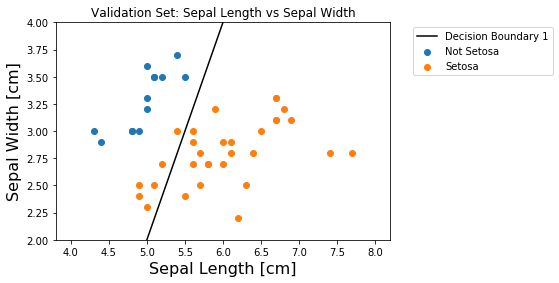

In [13]:
# Import validation csv to data frame
df_setosa_validation = pd.read_csv('setosa_validation.csv')

# Sort dataframe by label
df_setosa_validation = df_setosa_validation.sort_values("label")
df_setosa_validation = df_setosa_validation.reset_index(drop=True)

# Plot dataframe with labels
plt.title("Validation Set: Sepal Length vs Sepal Width")
plt.scatter(df_setosa_validation["sepal_length (cm)"][:13], df_setosa_validation["sepal_width (cm)"][:13], label="Not Setosa")
plt.scatter(df_setosa_validation["sepal_length (cm)"][13:], df_setosa_validation["sepal_width (cm)"][13:], label="Setosa")

# Plot decision boundaries
x = np.linspace(4, 8, 10)
plt.plot(x, 2*x-8, color="black", label="Decision Boundary 1")

plt.ylim([2, 4])
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel("Sepal Length [cm]", fontsize=16)
plt.ylabel("Sepal Width [cm]", fontsize=16)

Text(0, 0.5, 'Sepal Width [cm]')

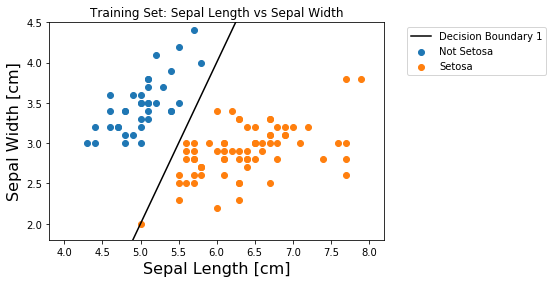

In [14]:
# Import training csv to data frame
df_setosa_training = pd.read_csv('setosa_training.csv')

# Sort dataframe by label
df_setosa_training = df_setosa_training.sort_values("label")
df_setosa_training = df_setosa_training.reset_index(drop=True)

# Plot dataframe with labels
plt.title("Training Set: Sepal Length vs Sepal Width")
plt.scatter(df_setosa_training["sepal_length (cm)"][:37], df_setosa_training["sepal_width (cm)"][:37], label="Not Setosa")
plt.scatter(df_setosa_training["sepal_length (cm)"][37:], df_setosa_training["sepal_width (cm)"][37:], label="Setosa")

# Plot decision boundaries
x = np.linspace(4, 8, 10)
plt.plot(x, 2*x-8, color="black", label="Decision Boundary 1")

plt.ylim([1.8, 4.5])
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel("Sepal Length [cm]", fontsize=16)
plt.ylabel("Sepal Width [cm]", fontsize=16)

Text(0, 0.5, 'Sepal Width [cm]')

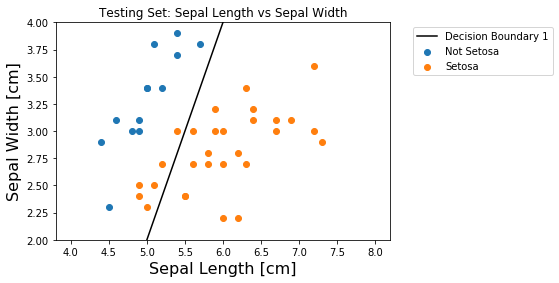

In [15]:
# Import validation csv to data frame
df_setosa_testing = pd.read_csv('setosa_testing.csv')

# Sort dataframe by label
df_setosa_testing = df_setosa_testing.sort_values("label")
df_setosa_testing = df_setosa_testing.reset_index(drop=True)

df_setosa_testing[:13]
# Plot dataframe with labels
plt.title("Testing Set: Sepal Length vs Sepal Width")
plt.scatter(df_setosa_testing["sepal_length (cm)"][:13], df_setosa_testing["sepal_width (cm)"][:13], label="Not Setosa")
plt.scatter(df_setosa_testing["sepal_length (cm)"][13:], df_setosa_testing["sepal_width (cm)"][13:], label="Setosa")

# Plot decision boundaries
x = np.linspace(4, 8, 10)
plt.plot(x, 2*x-8, color="black", label="Decision Boundary 1")

plt.ylim([2, 4])
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel("Sepal Length [cm]", fontsize=16)
plt.ylabel("Sepal Width [cm]", fontsize=16)

##### B. Evaluate the predictions for the given decision boundary using the pairs of data sets in the table below. Use the `linear_decision_boundary_classifier()` function to predict labels for the following data sets and the accuracy_score() function to evaluate the accuracies of the predictions

|   Train On   |   Evaluate On  |
|:------------:|:--------------:|
| Training Set | Training Set   |
| Training Set | Testing Set    |
| Training Set | Validation Set |

In [16]:
# Import training csv to data frame
df_setosa_validation = pd.read_csv('setosa_validation.csv')
df_setosa_training = pd.read_csv('setosa_training.csv')
df_setosa_testing = pd.read_csv('setosa_testing.csv')
dec_bound_vec = np.array([-2.0, 1.0, 8.0])

# Evaluate on training set
true_labels = df_setosa_training["label"].values
features = df_setosa_training[["sepal_length (cm)", "sepal_width (cm)"]].values
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
accuracy = sk.metrics.accuracy_score(true_labels, pred_labels)
print("Training Set Boundary Accuracy:", accuracy)

# Evaluate on testing set
true_labels = df_setosa_testing["label"].values
features = df_setosa_testing[["sepal_length (cm)", "sepal_width (cm)"]].values
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
accuracy = sk.metrics.accuracy_score(true_labels, pred_labels)
print("Testing Set Boundary Accuracy:", accuracy)

# Evaluate on validation set
true_labels = df_setosa_validation["label"].values
features = df_setosa_validation[["sepal_length (cm)", "sepal_width (cm)"]].values
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, true_labels, features)
accuracy = sk.metrics.accuracy_score(true_labels, pred_labels)
print("Validation Set Boundary Accuracy:", accuracy)

Training Set Boundary Accuracy: 1.0
Testing Set Boundary Accuracy: 0.8571428571428571
Validation Set Boundary Accuracy: 0.8636363636363636
